In [1]:
%load_ext watermark


In [2]:
from IPython.display import display
import pandas as pd
import polars as pl
import seaborn as sns
from teeplot import teeplot as tp

from pylib.viz._get_nben_cmap import get_nben_cmap
from pylib.viz._get_nben_hue_norm import get_nben_hue_norm
from pylib.viz._size_fixation_heatmap import size_fixation_heatmap


In [3]:
%watermark -diwmuv -iv


Last updated: 2024-10-13T22:36:00.533950+00:00

Python implementation: CPython
Python version       : 3.10.12
IPython version      : 7.31.1

Compiler    : GCC 11.4.0
OS          : Linux
Release     : 6.5.0-1025-azure
Machine     : x86_64
Processor   : x86_64
CPU cores   : 4
Architecture: 64bit

teeplot: 1.1.3
polars : 1.9.0
pandas : 2.2.3
seaborn: 0.13.2

Watermark: 2.4.3



In [4]:
teeplot_subdir = "wse-denovo-spatial2d-explicitsite-traits"
teeplot_subdir


'wse-denovo-spatial2d-explicitsite-traits'

## Prep Data


In [5]:
dfxs = pd.read_parquet("https://osf.io/4mdws/download")
display(dfxs.describe()), display(dfxs.head()), display(dfxs.tail());


,group,trait value,replicate,population size,available beneficial mutations,fixation probability
count,1.195758e+07,11957760.0,1.195776e+07,1.195776e+07,1.195776e+07,1.195776e+07
mean,2.452487e+05,0.5,1.044273e+19,6.286069e+03,7.600000e+00,5.000000e-01
std,1.567677e+05,0.5,6.306393e+18,9.114411e+05,4.983975e+00,4.999799e-01
min,0.000000e+00,0.0,5.629117e+16,2.560000e+02,1.000000e+00,0.000000e+00
25%,1.065180e+05,0.0,3.674821e+18,2.560000e+02,3.000000e+00,0.000000e+00
50%,2.325010e+05,0.5,1.103234e+19,2.560000e+02,7.000000e+00,5.000000e-01
75%,3.819710e+05,1.0,1.671838e+19,2.560000e+02,1.200000e+01,1.000000e+00
max,5.314400e+05,1.0,1.842861e+19,1.908480e+08,1.600000e+01,1.000000e+00


,group,trait value,replicate,population size,available beneficial mutations,fixation probability,genotype
0,143399.0,0,16718381540940362211,256,16,1.0,normomutator
1,353038.0,1,16718381540940362211,256,16,0.0,hypermutator
2,386220.0,0,16718381540940362211,256,16,1.0,normomutator
3,216825.0,1,16718381540940362211,256,16,0.0,hypermutator
4,18133.0,1,16718381540940362211,256,16,0.0,hypermutator


,group,trait value,replicate,population size,available beneficial mutations,fixation probability,genotype
11957755,279797.0,0,18180085808416268867,256,12,1.0,normomutator
11957756,287930.0,0,18180085808416268867,256,12,1.0,normomutator
11957757,475644.0,1,18180085808416268867,256,12,0.0,hypermutator
11957758,429702.0,1,18180085808416268867,256,12,0.0,hypermutator
11957759,488976.0,1,18180085808416268867,256,12,0.0,hypermutator


In [6]:
apn = dfxs["population size"].min()  # agents per node
apn


np.uint64(256)

## Size Fixation Curves


teeplots/wse-denovo-spatial2d-explicitsite-traits/col=available-beneficial-mutations+errorbar=sd+hue=genotype+kind=line+style=genotype+viz=relplot+x=population-size+y=fixation-probability+ext=.pdf
teeplots/wse-denovo-spatial2d-explicitsite-traits/col=available-beneficial-mutations+errorbar=sd+hue=genotype+kind=line+style=genotype+viz=relplot+x=population-size+y=fixation-probability+ext=.png


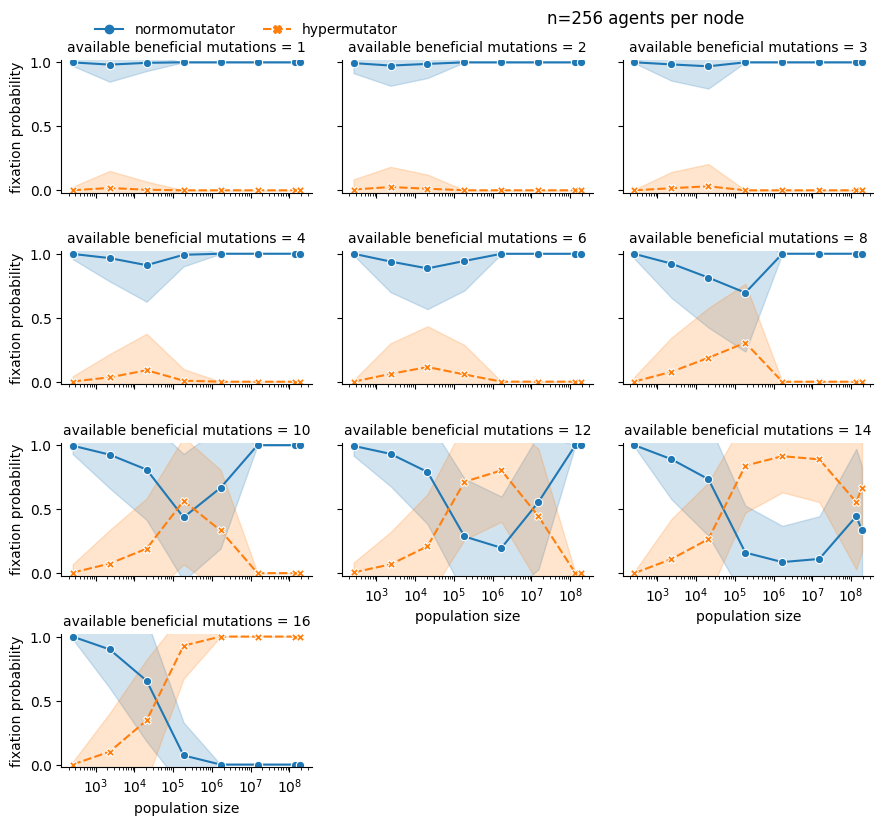

teeplots/wse-denovo-spatial2d-explicitsite-traits/col=available-beneficial-mutations+errorbar=se+hue=genotype+kind=line+style=genotype+viz=relplot+x=population-size+y=fixation-probability+ext=.pdf
teeplots/wse-denovo-spatial2d-explicitsite-traits/col=available-beneficial-mutations+errorbar=se+hue=genotype+kind=line+style=genotype+viz=relplot+x=population-size+y=fixation-probability+ext=.png


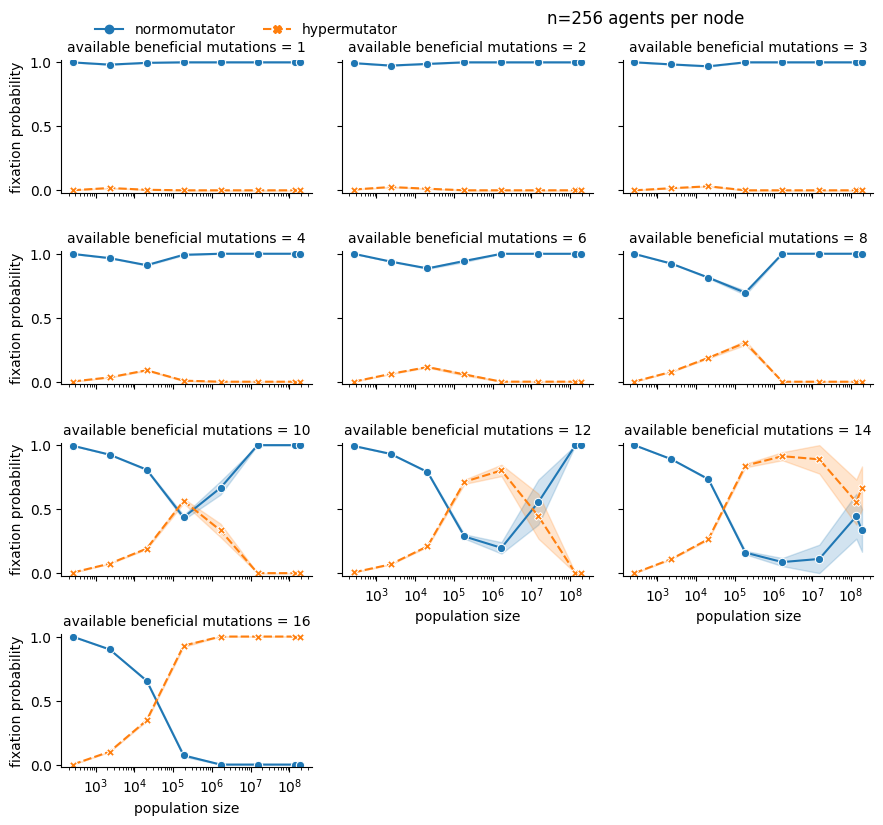

teeplots/wse-denovo-spatial2d-explicitsite-traits/col=available-beneficial-mutations+errorbar=ci+hue=genotype+kind=line+style=genotype+viz=relplot+x=population-size+y=fixation-probability+ext=.pdf
teeplots/wse-denovo-spatial2d-explicitsite-traits/col=available-beneficial-mutations+errorbar=ci+hue=genotype+kind=line+style=genotype+viz=relplot+x=population-size+y=fixation-probability+ext=.png


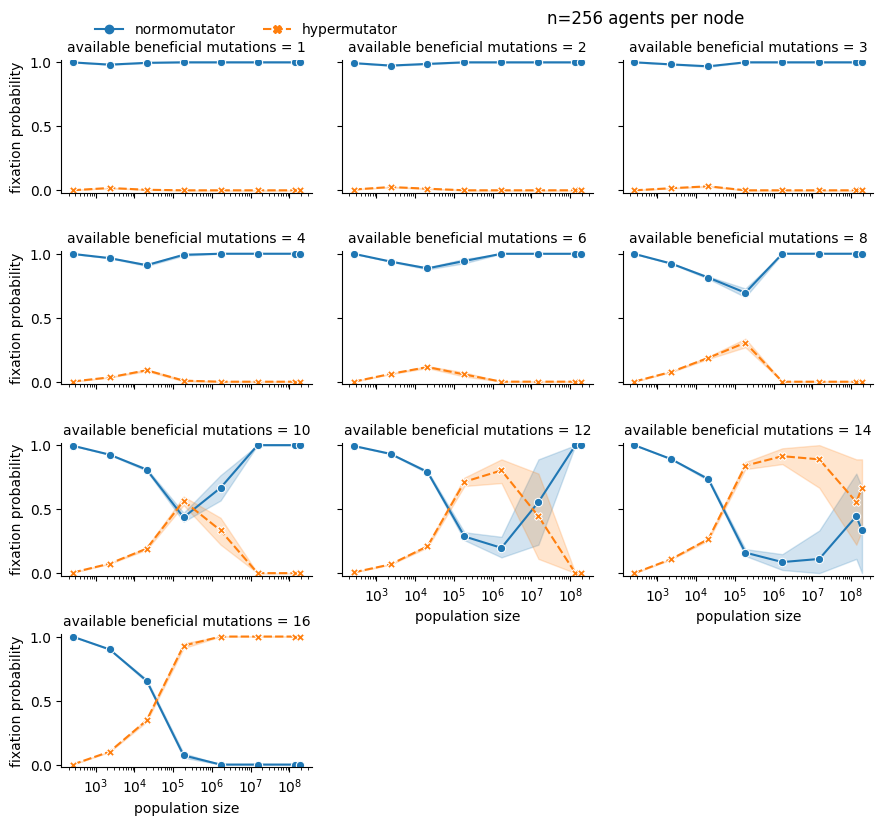

teeplots/wse-denovo-spatial2d-explicitsite-traits/col=available-beneficial-mutations+hue=genotype+kind=line+style=genotype+viz=relplot+x=population-size+y=fixation-probability+ext=.pdf
teeplots/wse-denovo-spatial2d-explicitsite-traits/col=available-beneficial-mutations+hue=genotype+kind=line+style=genotype+viz=relplot+x=population-size+y=fixation-probability+ext=.png


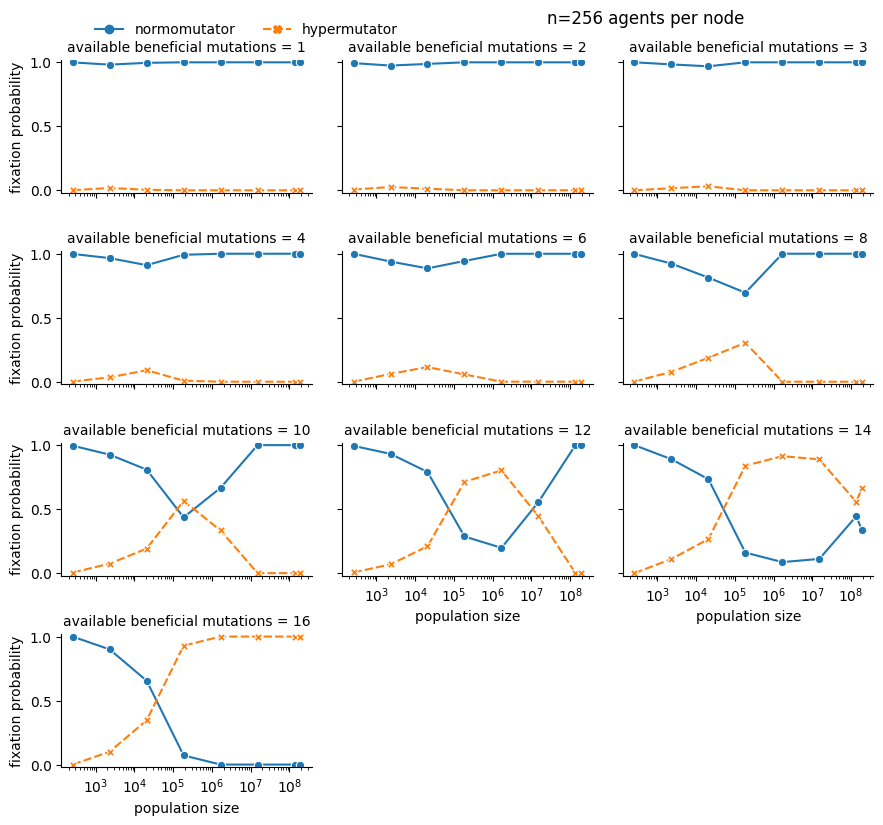

In [7]:
for errorbar in "sd", "se", "ci", None:
    tp.tee(
        sns.relplot,
        data=dfxs,
        x="population size",
        y="fixation probability",
        hue="genotype",
        hue_order=["normomutator", "hypermutator"],
        col="available beneficial mutations",
        style="genotype",
        style_order=["normomutator", "hypermutator"],
        aspect=1.5,
        col_wrap=3,
        errorbar=errorbar,
        height=2,
        kind="line",
        markers=True,
        teeplot_outexclude="post",
        teeplot_subdir=teeplot_subdir,
        teeplot_postprocess=f"""
teed.set(xscale="log", ylim=(-0.02, 1.02))
teed.figure.suptitle("n={apn} agents per node", x=0.63, y=1.02)
teed.set_titles(col_template="{{col_var}} = {{col_name:.0f}}")
sns.move_legend(
    teed,
    "lower center",
    bbox_to_anchor=(0.25, 0.97),
    frameon=False,
    ncol=2,
    title=None,
)
""",
    )


teeplots/wse-denovo-spatial2d-explicitsite-traits/errorbar=sd+hue=available-beneficial-mutations+kind=line+viz=relplot+x=population-size+y=fixation-probability+ext=.pdf
teeplots/wse-denovo-spatial2d-explicitsite-traits/errorbar=sd+hue=available-beneficial-mutations+kind=line+viz=relplot+x=population-size+y=fixation-probability+ext=.png


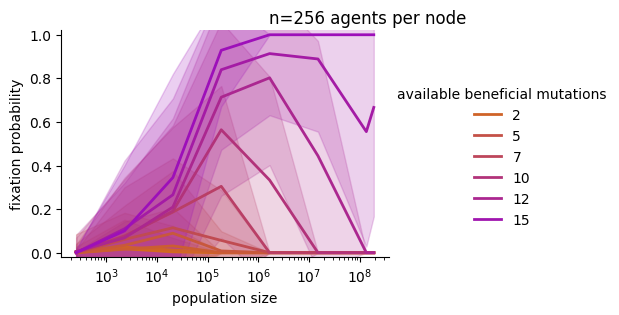

teeplots/wse-denovo-spatial2d-explicitsite-traits/errorbar=se+hue=available-beneficial-mutations+kind=line+viz=relplot+x=population-size+y=fixation-probability+ext=.pdf
teeplots/wse-denovo-spatial2d-explicitsite-traits/errorbar=se+hue=available-beneficial-mutations+kind=line+viz=relplot+x=population-size+y=fixation-probability+ext=.png


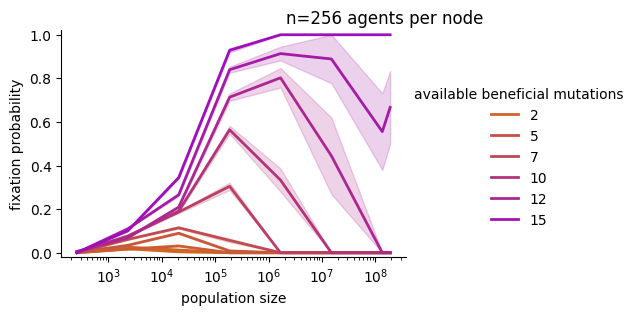

teeplots/wse-denovo-spatial2d-explicitsite-traits/errorbar=ci+hue=available-beneficial-mutations+kind=line+viz=relplot+x=population-size+y=fixation-probability+ext=.pdf
teeplots/wse-denovo-spatial2d-explicitsite-traits/errorbar=ci+hue=available-beneficial-mutations+kind=line+viz=relplot+x=population-size+y=fixation-probability+ext=.png


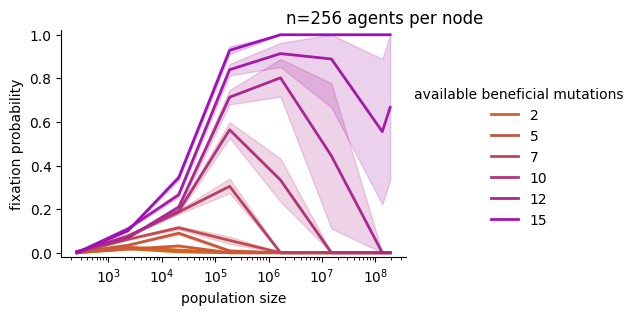

teeplots/wse-denovo-spatial2d-explicitsite-traits/hue=available-beneficial-mutations+kind=line+viz=relplot+x=population-size+y=fixation-probability+ext=.pdf
teeplots/wse-denovo-spatial2d-explicitsite-traits/hue=available-beneficial-mutations+kind=line+viz=relplot+x=population-size+y=fixation-probability+ext=.png


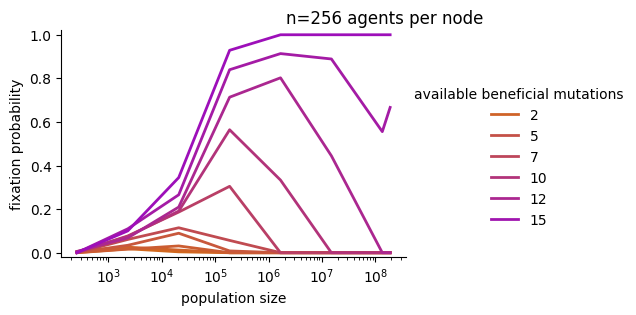

In [8]:
for errorbar in "sd", "se", "ci", None:
    tp.tee(
        sns.relplot,
        data=dfxs[dfxs["genotype"] == "hypermutator"],
        x="population size",
        y="fixation probability",
        hue="available beneficial mutations",
        aspect=1.5,
        height=3,
        kind="line",
        errorbar=errorbar,
        linewidth=2,
        markers=True,
        palette=get_nben_cmap(),
        hue_norm=get_nben_hue_norm(),
        teeplot_outexclude="post",
        teeplot_postprocess=f"""
teed.set(xscale="log", ylim=(-0.02, 1.02))
teed.figure.suptitle("n={apn} agents per node", x=0.63, y=1.02)
teed.set_titles(col_template='{{col_var}} = {{col_name:.0f}}')
""",
        teeplot_subdir=teeplot_subdir,
    )


## Size Fixation Heatmap


teeplots/wse-denovo-spatial2d-explicitsite-traits/genotype=hypermutator+index=available-beneficial-mutations+on=population-size+values=fixation-probability+viz=size-fixation-heatmap+ext=.pdf
teeplots/wse-denovo-spatial2d-explicitsite-traits/genotype=hypermutator+index=available-beneficial-mutations+on=population-size+values=fixation-probability+viz=size-fixation-heatmap+ext=.png


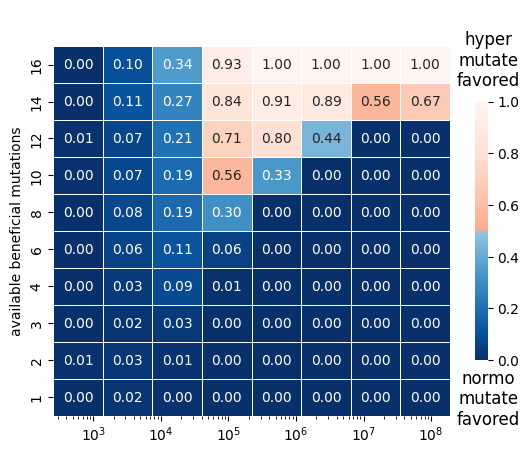

<Axes: ylabel='available beneficial mutations'>

In [9]:
tp.tee(
    size_fixation_heatmap,
    fixprobs_df=dfxs,
    genotype="hypermutator",
    index="available beneficial mutations",
    on="population size",
    values="fixation probability",
    teeplot_subdir=teeplot_subdir,
)


## Quality Check: Number Replicates Available


In [10]:
categories = (
    pl.DataFrame(dfxs)
    .group_by(
        "population size",
    )
    .first()["population size"]
    .sort()
    .cast(pl.String)
    .to_list()
)
categories


['256',
 '2304',
 '20736',
 '186624',
 '1679616',
 '15116544',
 '136048896',
 '190848000']

In [11]:
dfy = pl.DataFrame(dfxs).with_columns(
    pl.col("population size")
    .cast(pl.String)
    .cast(pl.Enum(categories))
    .alias("population size cat"),
)
display(dfy.describe()), display(dfy.head()), display(dfy.tail());


statistic,group,trait value,replicate,population size,available beneficial mutations,fixation probability,genotype,population size cat
str,f64,f64,f64,f64,f64,f64,str,str
"""count""",1.195758e7,1.195776e7,1.195776e7,1.195776e7,1.195776e7,1.195776e7,"""11957760""","""11957760"""
"""null_count""",180.0,0.0,0.0,0.0,0.0,0.0,"""0""","""0"""
"""mean""",245248.692779,0.5,1.0443e19,6286.069364,7.6,0.5,null,null
"""std""",156767.703871,0.5,6.3064e18,911441.090039,4.983975,0.49998,null,null
"""min""",0.0,0.0,5.6291e16,256.0,1.0,0.0,null,null
"""25%""",106518.0,0.0,3.6748e18,256.0,3.0,0.0,null,null
"""50%""",232501.0,1.0,1.1032e19,256.0,8.0,0.860677,null,null
"""75%""",381971.0,1.0,1.6718e19,256.0,12.0,1.0,null,null
"""max""",531440.0,1.0,1.8429e19,1.90848e8,16.0,1.0,null,null


group,trait value,replicate,population size,available beneficial mutations,fixation probability,genotype,population size cat
f64,u8,u64,u64,i8,f64,cat,enum
143399.0,0,16718381540940362211,256,16,1.0,"""normomutator""","""256"""
353038.0,1,16718381540940362211,256,16,0.0,"""hypermutator""","""256"""
386220.0,0,16718381540940362211,256,16,1.0,"""normomutator""","""256"""
216825.0,1,16718381540940362211,256,16,0.0,"""hypermutator""","""256"""
18133.0,1,16718381540940362211,256,16,0.0,"""hypermutator""","""256"""


group,trait value,replicate,population size,available beneficial mutations,fixation probability,genotype,population size cat
f64,u8,u64,u64,i8,f64,cat,enum
279797.0,0,18180085808416268867,256,12,1.0,"""normomutator""","""256"""
287930.0,0,18180085808416268867,256,12,1.0,"""normomutator""","""256"""
475644.0,1,18180085808416268867,256,12,0.0,"""hypermutator""","""256"""
429702.0,1,18180085808416268867,256,12,0.0,"""hypermutator""","""256"""
488976.0,1,18180085808416268867,256,12,0.0,"""hypermutator""","""256"""


teeplots/wse-denovo-spatial2d-explicitsite-traits/col=available-beneficial-mutations+hue=genotype+kind=hist+multiple=dodge+viz=displot+x=population-size-cat+ext=.pdf
teeplots/wse-denovo-spatial2d-explicitsite-traits/col=available-beneficial-mutations+hue=genotype+kind=hist+multiple=dodge+viz=displot+x=population-size-cat+ext=.png


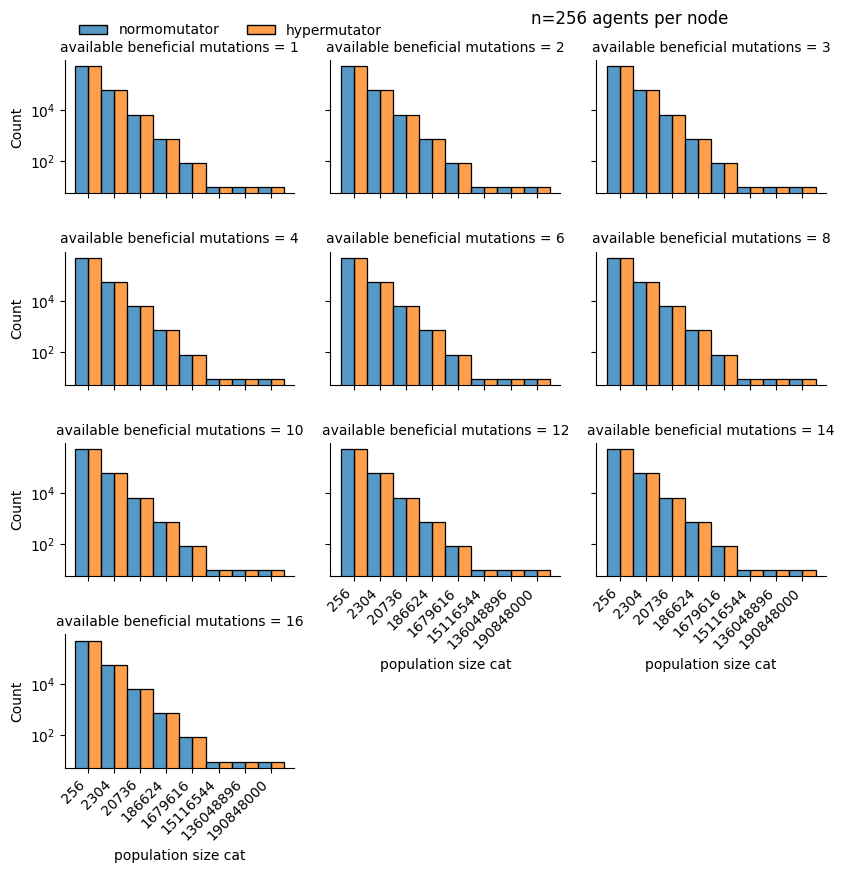

In [12]:
tp.tee(
    sns.displot,
    data=dfy.to_pandas(),
    x="population size cat",
    hue="genotype",
    hue_order=["normomutator", "hypermutator"],
    col="available beneficial mutations",
    aspect=1.5,
    col_wrap=3,
    height=2,
    kind="hist",
    multiple="dodge",
    teeplot_outexclude="post",
    teeplot_postprocess=f"""
teed.set(yscale='log')
teed.figure.suptitle("n={apn} agents per node", x=0.63, y=1.02)
teed.set_titles(col_template='{{col_var}} = {{col_name:.0f}}')
for ax in teed.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(45)
        label.set_ha("right")
sns.move_legend(
    teed, "lower center",
    bbox_to_anchor=(0.25, 0.97),
    frameon=False,
    ncol=2,
    title=None,
)
""",
    teeplot_subdir=teeplot_subdir,
)


## Quality Check: Has Reached Fixation?


In [13]:
dfxs_ = dfxs[dfxs["genotype"] == "hypermutator"].copy().reset_index(drop=True)


In [14]:
dfxs_["unfixed"] = (dfxs_["fixation probability"] != 1.0) & (
    dfxs_["fixation probability"] > 0.001
)
any_unfixed = dfxs_["unfixed"].any()
any_unfixed


np.True_

teeplots/wse-denovo-spatial2d-explicitsite-traits/col=available-beneficial-mutations+hue=genotype+kind=scatter+style=genotype+viz=relplot+x=population-size+y=fixation-probability+ext=.pdf
teeplots/wse-denovo-spatial2d-explicitsite-traits/col=available-beneficial-mutations+hue=genotype+kind=scatter+style=genotype+viz=relplot+x=population-size+y=fixation-probability+ext=.png


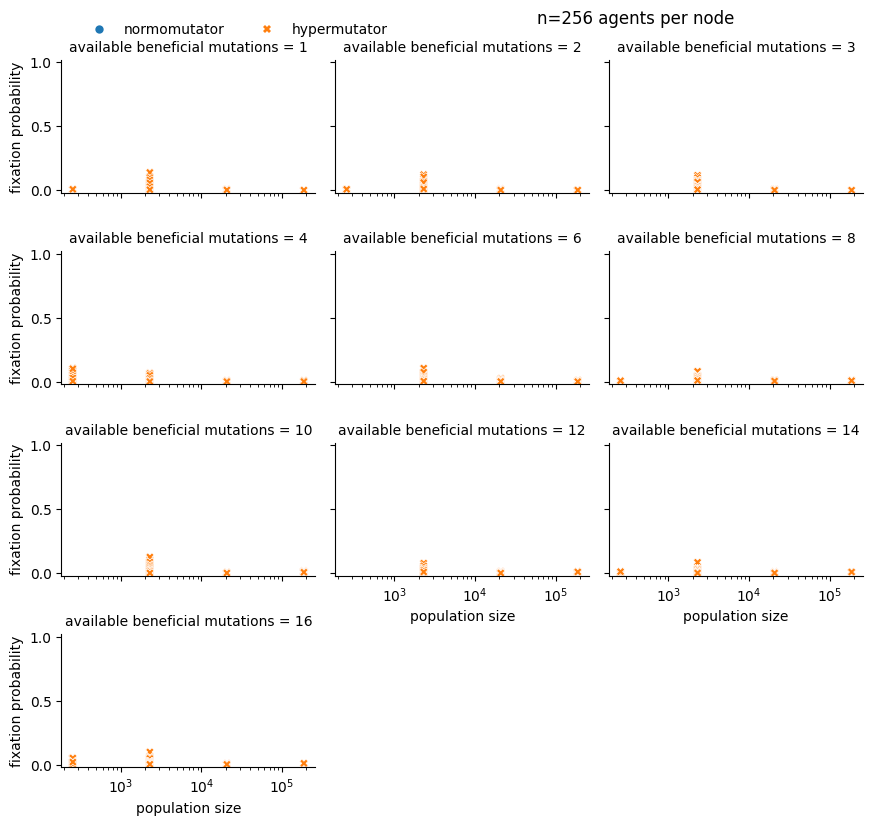

In [15]:
tp.tee(
    sns.relplot,
    data=dfxs_[dfxs_["unfixed"]],
    x="population size",
    y="fixation probability",
    hue="genotype",
    hue_order=["normomutator", "hypermutator"],
    col=[None, "available beneficial mutations"][int(any_unfixed)],
    style="genotype",
    style_order=["normomutator", "hypermutator"],
    aspect=1.5,
    col_wrap=[None, 3][int(any_unfixed)],
    height=2,
    kind="scatter",
    markers=bool(any_unfixed),
    teeplot_outexclude="post",
    teeplot_postprocess=f"""
teed.set(xscale='log', ylim=(-0.02, 1.02))
teed.figure.suptitle("n={apn} agents per node", x=0.63, y=1.02)
teed.set_titles(col_template='{{col_var}} = {{col_name:.0f}}')
try:
    sns.move_legend(
        teed,
        "lower center",
        bbox_to_anchor=(0.25, 0.97),
        frameon=False,
        ncol=2,
        title=None,
    )
except ValueError:
    pass
""",
    teeplot_subdir=teeplot_subdir,
)


teeplots/wse-denovo-spatial2d-explicitsite-traits/col=available-beneficial-mutations+hue=unfixed+multiple=fill+viz=displot+x=population-size+ext=.pdf
teeplots/wse-denovo-spatial2d-explicitsite-traits/col=available-beneficial-mutations+hue=unfixed+multiple=fill+viz=displot+x=population-size+ext=.png


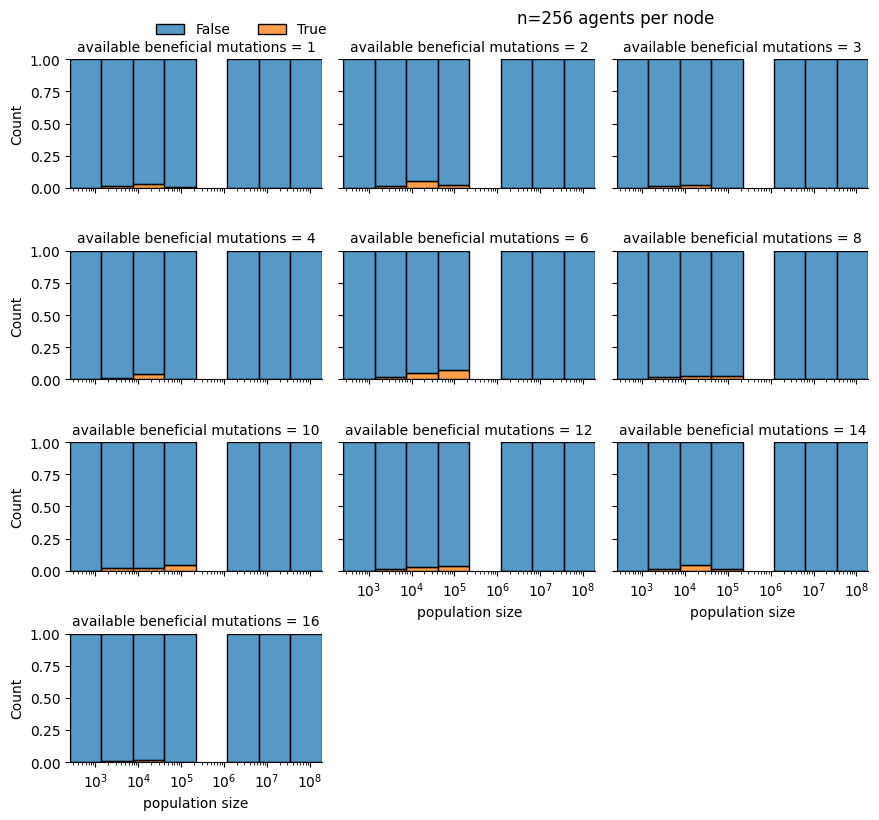

In [16]:
tp.tee(
    sns.displot,
    data=dfxs_.reset_index(drop=True),
    x="population size",
    hue="unfixed",
    col="available beneficial mutations",
    col_wrap=3,
    aspect=1.5,
    height=2,
    multiple="fill",
    bins=dfxs_["population size"].nunique(),
    log_scale=(True, False),
    teeplot_outexclude="post",
    teeplot_postprocess=f"""
teed.figure.suptitle("n={apn} agents per node", x=0.63, y=1.02)
teed.set_titles(col_template='{{col_var}} = {{col_name:.0f}}')
sns.move_legend(
    teed,
    "lower center",
    bbox_to_anchor=(0.25, 0.97),
    frameon=False,
    ncol=2,
    title=None,
)
""",
    teeplot_subdir=teeplot_subdir,
)
